## Proyecto 1: Clasificación de enfermedades con Tomografias MRI de pecho

### Integrantes:

- **Primer Integrante:** Jesús Antonio Guerrero López

- **Segundo Integrante:** Daniel Alfredo García Sanchez

In [1]:
%pip install --upgrade tensorflow
#%pip install --upgrade protobuf

import pandas as pd
import numpy as np
np.random.seed(0)
seed = 0
import warnings
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tqdm import tqdm
plt.style.use("dark_background")
#plt.style.use("grayscale")


^C
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'cv2'

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.68.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

### Cargar base de datos

In [79]:
# Cargamos la carpeta con las imagenes

folder = '/Users/antonio/Desktop/Filtrado_subcarpetas'

# Inicializa las listas para almacenar los datos de entrenamiento

x_train = []
y_label = []

# Tamaño de las imágenes

IMG_SIZE = 255
 

# Recorre los archivos en la carpeta de datos
for dirname, _, filenames in os.walk(folder):
    for filename in filenames:
        # Construye la ruta completa de la imagen
        img_path = os.path.join(dirname, filename)
        
        # Lee la imagen usando OpenCV
        im = cv2.imread(img_path)
        
        # Verifica si la imagen se cargó correctamente
        if im is not None:
            # Cambia el formato de color de BGR a RGB
            img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            
            # Redimensiona la imagen al tamaño deseado
            new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            # Determina la etiqueta de la imagen según la carpeta en la que se encuentra
            if 'Atelectasis' in dirname:
                y_label.append(0)
            elif 'Cardiomegaly' in dirname:
                y_label.append(1)
            elif 'Consolidation' in dirname:
                y_label.append(2)
            elif 'Effusion' in dirname:
                y_label.append(3)
            elif 'Infiltration' in dirname:
                y_label.append(4)
            elif 'Mass' in dirname:
                y_label.append(5)
            elif 'No Finding' in dirname:
                y_label.append(6)
            elif 'Nodule' in dirname:
                y_label.append(7)
            elif 'Pleural_Thickening' in dirname:
                y_label.append(8)
            elif 'Pneumothorax' in dirname:
                y_label.append(9)
            
            # Agrega la imagen redimensionada a la lista de datos de entrenamiento
            x_train.append(new_array)
        else:
            print("No se pudo cargar la imagen:", img_path)

# Convertir las listas en matrices numpy
x_train = np.array(x_train)
y_label = np.array(y_label)


No se pudo cargar la imagen: /Users/antonio/Desktop/Filtrado_subcarpetas/.DS_Store


In [80]:
x_train = np.array(x_train)
x_train.shape

(10000, 255, 255, 3)

In [81]:
y_label = np.array(y_label)
y_label = pd.get_dummies(y_label)
y_label.shape

(10000, 10)

#### Visualizacion de las imagenes

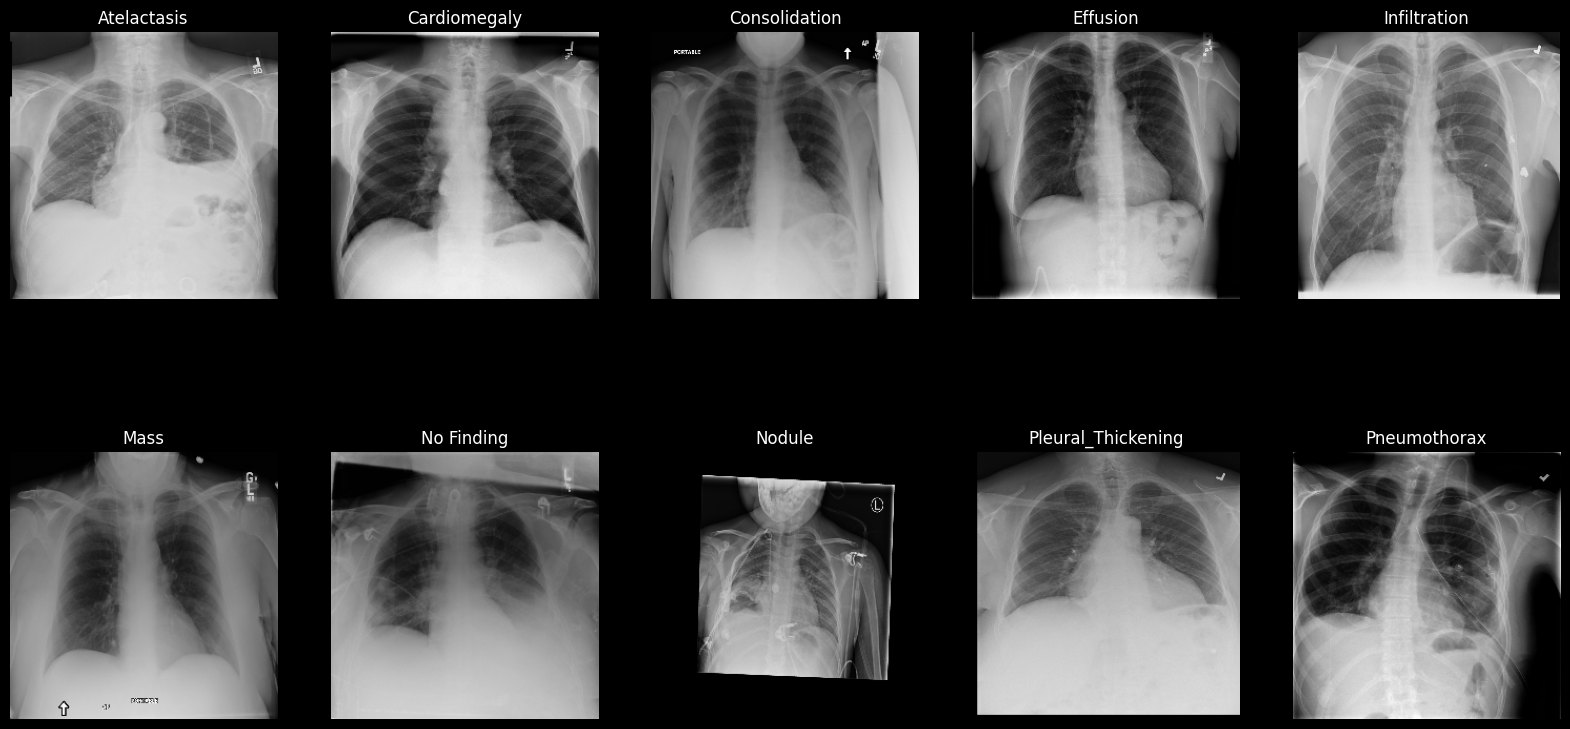

In [82]:
# Crear un gráfico con las 10 categorías
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))
title = ["Atelactasis",
         "Cardiomegaly",
         "Consolidation",
         "Effusion",
         "Infiltration",
         "Mass",
         "No Finding",
         "Nodule",
         "Pleural_Thickening",
         "Pneumothorax"
         ]
for i in range(10):
    rand_ind = np.random.randint(0, y_label[y_label==i].shape[0])
    ax = axes[i//5, i%5]
    ax.imshow(x_train[rand_ind])
    ax.set_title(title[i])
    ax.axis('off')

plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y_label, test_size=0.3, random_state=seed
)

In [84]:
X_train.shape

(7000, 255, 255, 3)

In [85]:
from warnings import filterwarnings
for dirname, _, filenames in os.walk('/Users/antonio/Desktop/archive/Training'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

X_train1 = []
y_train1 = []
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Effusion', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumothorax']

folder = '/Users/antonio/Desktop/Filtrado_subcarpetas'

image_size = 150
for i in labels:
    folderPath = os.path.join(folder,'train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train1.append(img)
        y_train1.append(i)
        
for i in labels:
    folderPath = os.path.join(folder, 'test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train1.append(img)
        y_train1.append(i)
        
X_train1 = np.array(X_train)
y_train1 = np.array(y_train1)

100%|██████████| 300/300 [00:07<00:00, 39.17it/s]


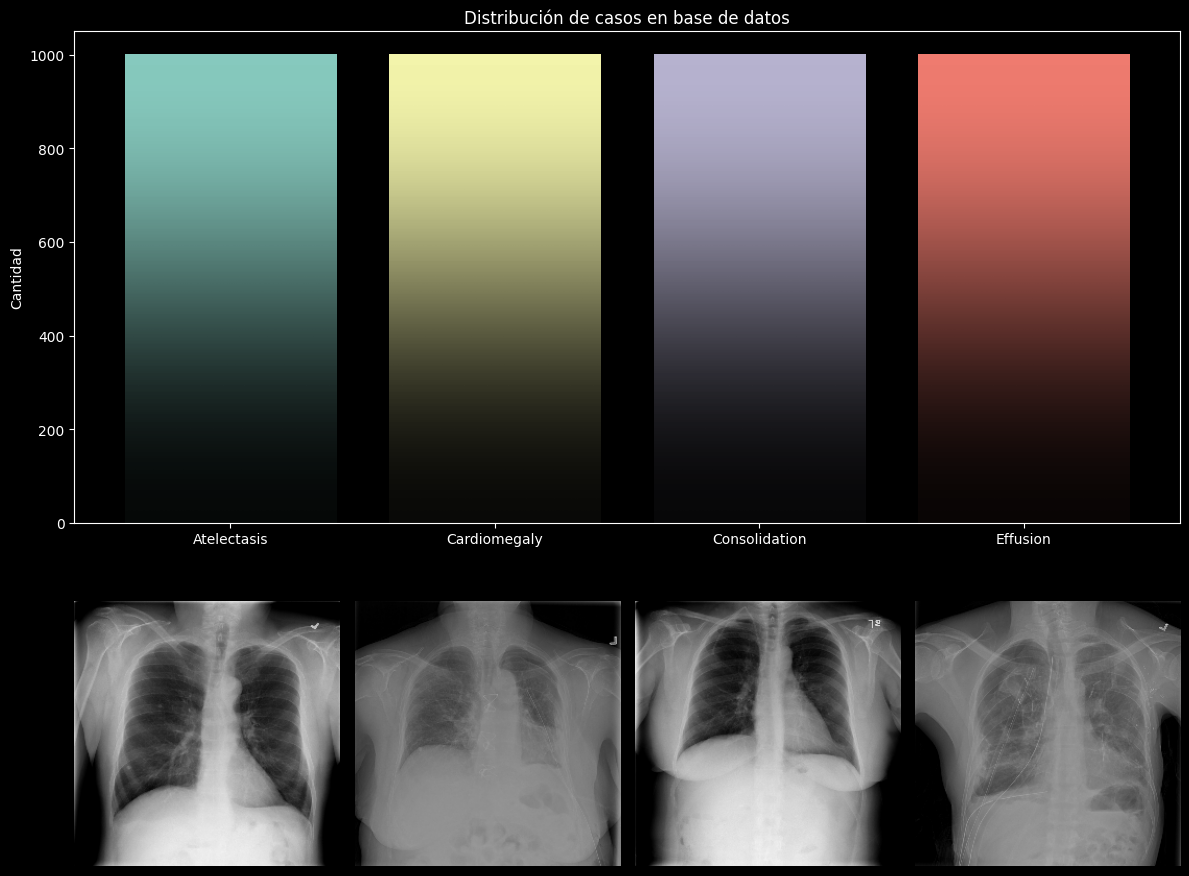

In [86]:
# Calcular el conteo de etiquetas
label_counts = {label: np.sum(y_train1 == label) for label in labels}

# Crear la figura y los ejes
plt.figure(figsize=(12, 10))

colors = ["C0", "C1", "C2", "C3"]

# Graficar el histograma para las primeras 4 etiquetas
plt.subplot(2, 1, 1)
bars = plt.bar(list(label_counts.keys())[:4], list(label_counts.values())[:4], color=colors[:4])
mplcyberpunk.add_bar_gradient(bars=bars)
plt.ylabel('Cantidad')
plt.title('Distribución de casos en base de datos')

# Graficar imágenes de muestra para las primeras 4 etiquetas debajo de cada barra
for k, i in enumerate(labels[:4]):
    j = 0
    while True:
        if y_train1[j] == i:
            plt.subplot(2, 4, k + 5)  # Ajustar la posición del subplot
            plt.imshow(X_train1[j])
            plt.axis('off')
            break
        j += 1
        
plt.tight_layout()
plt.show()

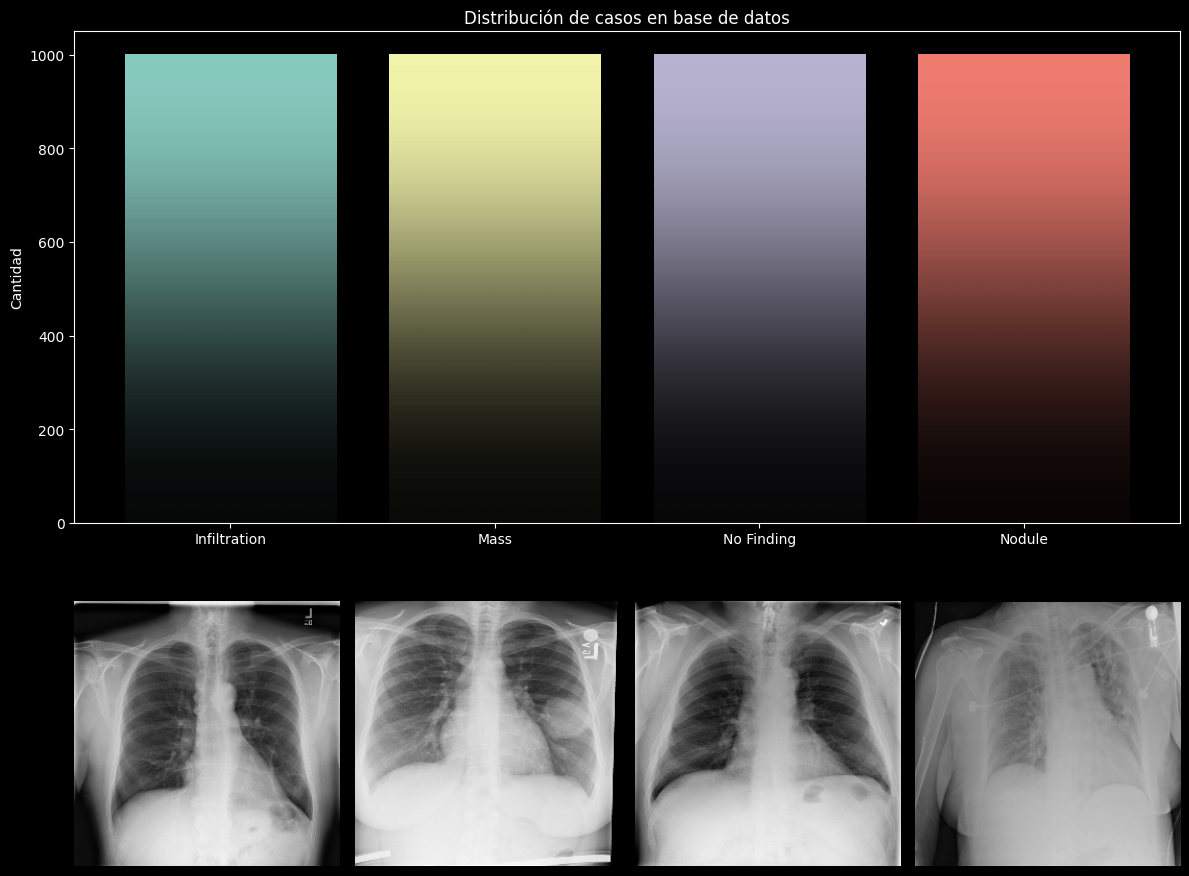

In [87]:
# Calcular el conteo de etiquetas
label_counts = {label: np.sum(y_train1 == label) for label in labels}

# Crear la figura y los ejes
plt.figure(figsize=(12, 10))

colors = ["C0", "C1", "C2", "C3"]

# Graficar el histograma para las siguientes 4 etiquetas
plt.subplot(2, 1, 1)
bars = plt.bar(list(label_counts.keys())[4:8], list(label_counts.values())[4:8], color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
plt.ylabel('Cantidad')
plt.title('Distribución de casos en base de datos')

# Graficar imágenes de muestra para las siguientes 4 etiquetas debajo de cada barra
for k, i in enumerate(labels[4:8]):
    j = 0
    while True:
        if y_train1[j] == i:
            plt.subplot(2, 4, k + 5)  # Ajustar la posición del subplot
            plt.imshow(X_train1[j])
            plt.axis('off')
            break
        j += 1
        
plt.tight_layout()
plt.show()

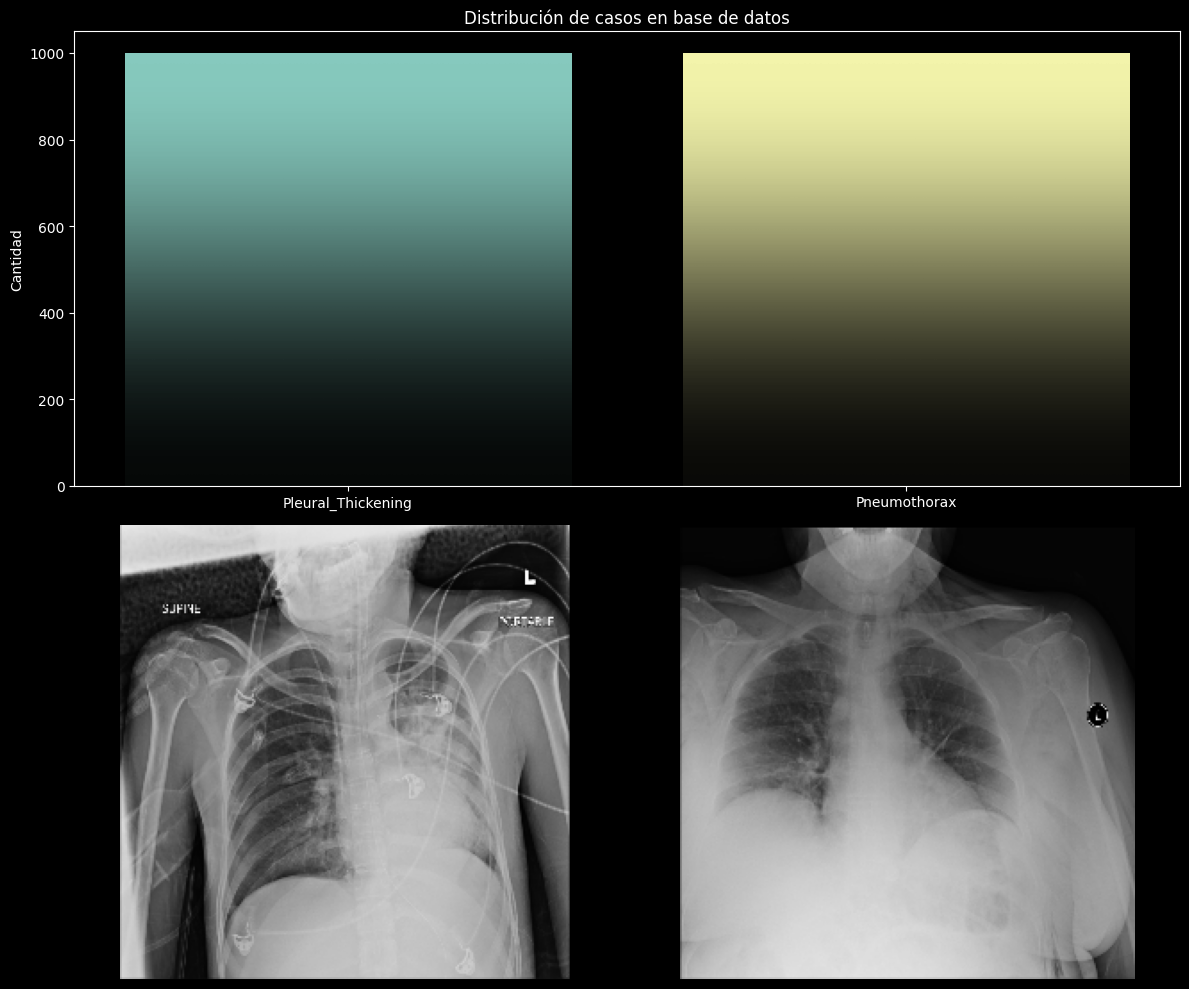

In [88]:
# Calcular el conteo de etiquetas
label_counts = {label: np.sum(y_train1 == label) for label in labels}

# Crear la figura y los ejes
plt.figure(figsize=(12, 10))

colors = ["C0", "C1"]

# Graficar el histograma para las últimas 2 etiquetas
plt.subplot(2, 1, 1)
bars = plt.bar(list(label_counts.keys())[8:10], list(label_counts.values())[8:10], color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
plt.ylabel('Cantidad')
plt.title('Distribución de casos en base de datos')

# Graficar imágenes de muestra para las últimas 2 etiquetas debajo de cada barra
for k, i in enumerate(labels[8:10]):
    j = 0
    while True:
        if y_train1[j] == i:
            plt.subplot(2, 2, k + 3)  # Ajustar la posición del subplot
            plt.imshow(X_train1[j])
            plt.axis('off')
            break
        j += 1
        
plt.tight_layout()
plt.show()


In [89]:
train_datagen = ImageDataGenerator(rotation_range=30,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
                                  )

for i in range(0,10000):
    img_tensor = np.expand_dims(X_train[i], axis=0)
    pic = train_datagen.flow(img_tensor,batch_size =1, seed=0)
    batch = next(pic)
    image_ = batch[0].astype('uint8')
    X_train = np.append(X_train, [image_], axis=0)
print(image_.shape)

: 

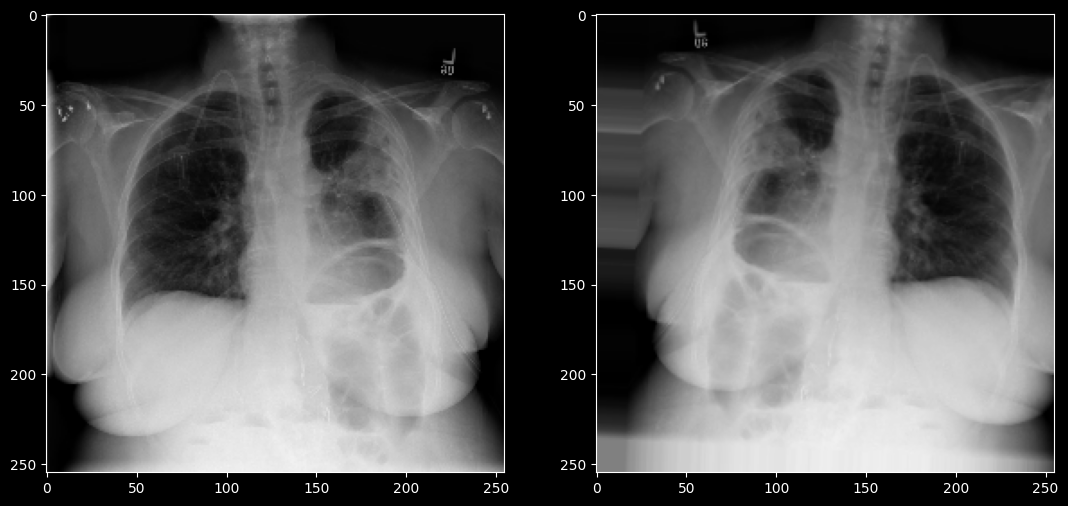

In [ ]:
# Seleccionamos un numero aleatorio entre 0 y 7000
num_ale = np.random.randint(0,10000)

# Creamos una figura con 2 subplots donde se pondrá la imagen original y la imagen aumentada
fig, axes = plt.subplots(ncols=2, figsize=(13,6))
axes[0].imshow(X_train[num_ale])
axes[1].imshow(X_train[num_ale+10000])

In [ ]:
y_train = pd.concat([y_train,y_train])
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_train

## Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


# Normalización las imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0

# Construcción CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])

# Corre el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en datos de prueba: {test_acc:.2f}")

# Predicciones y reporte final
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

print(classification_report(y_test_labels, y_pred_labels, target_names=["Atelectasis",
                                                                        "Cardiomegaly",
                                                                        "Consolidation",
                                                                        "Effusion",
                                                                        "Infiltration",
                                                                        "Mass",
                                                                        "No Finding",
                                                                        "Nodule",
                                                                        "Pleural_Thickening",
                                                                        "Pneumothorax"]))
